In [1]:
import numpy as np 
import pandas as pd
import sklearn
from sklearn import metrics , preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings('ignore')

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(np.shape(data))
data

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [4]:
print(data.isnull().mean())
print(data.duplicated().sum())

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64
0


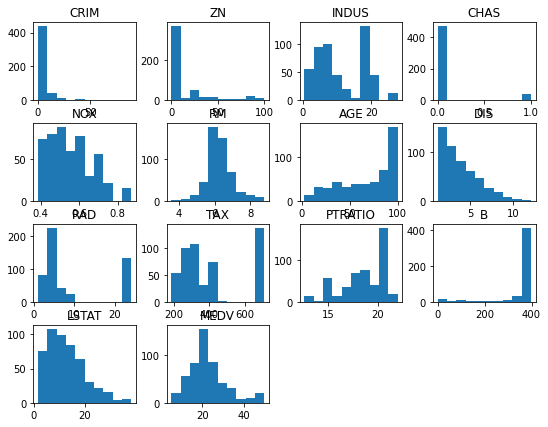

In [5]:
data.hist(bins=10,figsize=(9,7),grid=False);

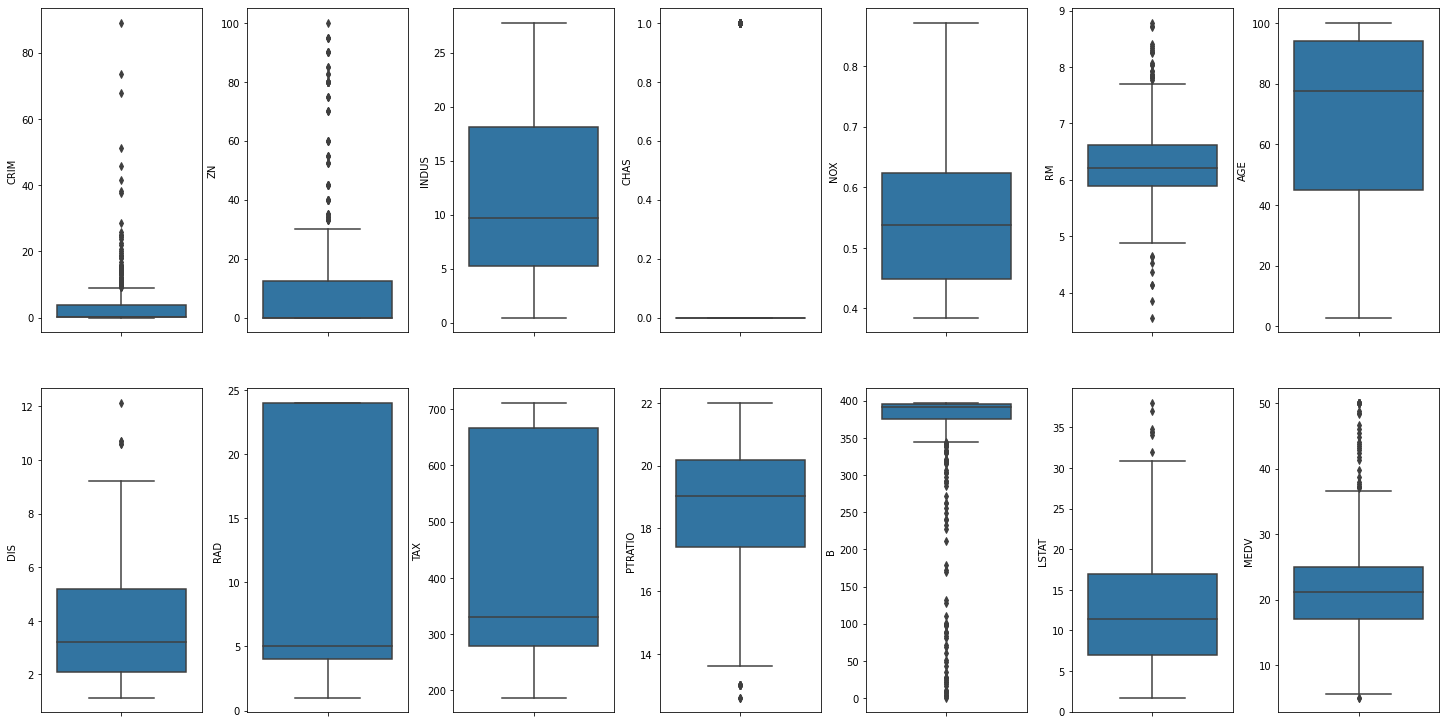

In [6]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [7]:
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


<AxesSubplot:>

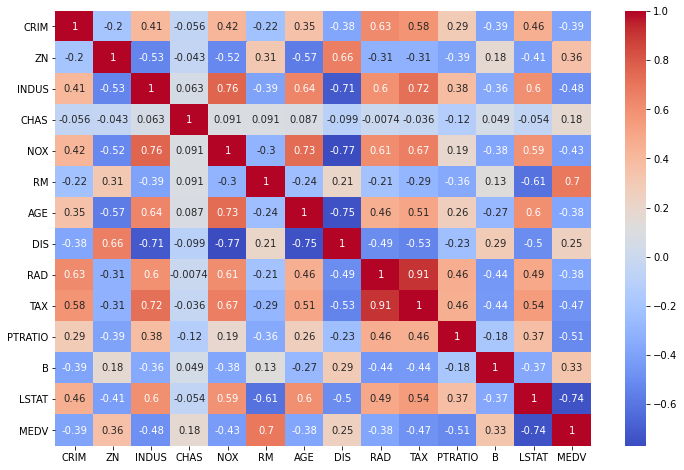

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot= True, cmap='coolwarm')

In [9]:
X = data.drop("MEDV" , axis=1)
Y = data.MEDV
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=46)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(455, 13)
(51, 13)
(455,)
(51,)


In [12]:
# min_max_scaler = preprocessing.MinMaxScaler()

# X_train = min_max_scaler.fit_transform(X_train)
# X_test = min_max_scaler.transform(X_test)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
Y_pred_train = lin_model.predict(X_train)

print('R^2:',metrics.r2_score(Y_train, Y_pred_train))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred_train))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred_train))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)))

# perform cross-validation
cv_score = cross_val_score(lin_model, X, Y, scoring='neg_mean_squared_error', cv=10)
cv_score = np.abs(np.mean(cv_score))
print('CV Score:', cv_score)

Y_pred_test = lin_model.predict(X_test)

print(".......................................")
print('R^2:',metrics.r2_score(Y_test, Y_pred_test))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, Y_pred_test))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_pred_test))
print('MSE:',metrics.mean_squared_error(Y_test, Y_pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)))




R^2: 0.7376449732541681
Adjusted R^2: 0.7299111516040642
MAE: 3.3199028641031267
MSE: 22.74756053827829
RMSE: 4.769440275155806
CV Score: 34.705255944524936
.......................................
R^2: 0.7677565336121858
Adjusted R^2: 0.6861574778543051
MAE: 2.828288105821922
MSE: 14.752962169604986
RMSE: 3.8409584962096357


## Test various hypothesis with different degrees

In [13]:
for degree in range(1, 6):
    scores_cv = []
    print(f'Polynomial of degree {degree}')
    print("..............................")
    for cv in range(5,11):
        model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LinearRegression(normalize=True)) 
        scores = cross_val_score(model, X_train, Y_train, cv=cv, scoring='neg_mean_absolute_error')
        scores_cv.append(scores.mean())
        print(f'CV {cv}')
        print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), -max(scores)))
        print(f'Best cv score is {max(scores_cv)}')

Polynomial of degree 1
..............................
CV 5
MSE: -3.54 (+/- 3.22)
Best cv score is -3.54267911144525
CV 6
MSE: -3.53 (+/- 3.14)
Best cv score is -3.5334398645956786
CV 7
MSE: -3.53 (+/- 3.06)
Best cv score is -3.527515690751136
CV 8
MSE: -3.49 (+/- 2.94)
Best cv score is -3.494043133148987
CV 9
MSE: -3.52 (+/- 2.90)
Best cv score is -3.494043133148987
CV 10
MSE: -3.51 (+/- 2.70)
Best cv score is -3.494043133148987
Polynomial of degree 2
..............................
CV 5
MSE: -2.58 (+/- 2.42)
Best cv score is -2.5822910403671164
CV 6
MSE: -2.61 (+/- 2.43)
Best cv score is -2.5822910403671164
CV 7
MSE: -2.56 (+/- 2.37)
Best cv score is -2.557888863885141
CV 8
MSE: -2.53 (+/- 2.18)
Best cv score is -2.5291059890488254
CV 9
MSE: -2.53 (+/- 2.06)
Best cv score is -2.5291059890488254
CV 10
MSE: -2.52 (+/- 2.16)
Best cv score is -2.5198027303009263
Polynomial of degree 3
..............................
CV 5
MSE: -44.35 (+/- 19.26)
Best cv score is -44.35266132905159
CV 6
MSE: 

##### The best degree then is 2 with cv = 10 and mae = 2.578867658670155

In [14]:
model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)

print('R^2:',metrics.r2_score(Y_train, Y_pred_train))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred_train))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred_train))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)))

Y_pred_test = model.predict(X_test)

print(".......................................")
print('R^2:',metrics.r2_score(Y_test, Y_pred_test))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, Y_pred_test))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_pred_test))
print('MSE:',metrics.mean_squared_error(Y_test, Y_pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)))

scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='neg_mean_absolute_error')
print("MAE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))





R^2: 0.9323741069555465
Adjusted R^2: 0.9303805999043494
MAE: 1.7760846088165705
MSE: 5.863520570063859
RMSE: 2.421470745242209
.......................................
R^2: 0.8471599205735066
Adjusted R^2: 0.7934593521263603
MAE: 2.4695710010047542
MSE: 9.708965960804267
RMSE: 3.1159213662742307
MAE: -2.52 (+/- 0.31)


In [15]:
print("Root Mean Square Error (RMSE) score\n")
kfold = KFold(n_splits=10)
cv = cross_val_score(lin_model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
sqrt_cv = [np.math.sqrt(abs(i)) for i in cv]
print("{} ({})".format( np.mean(sqrt_cv), np.std(sqrt_cv)))
print("Mean Square Error (MSE) score\n")
print("{} ({})".format( -np.mean(cv), np.std(cv)))
print('Result from each iteration of cross validation:', cv, '\n')
cv = cross_val_score(lin_model, X, Y, cv=kfold, scoring='neg_mean_absolute_error')
print("Mean AbSolute Error (RAE) score\n")
print("{} ({})".format( -np.mean(cv), np.std(cv)))

Root Mean Square Error (RMSE) score

5.180845679340265 (2.804299197907785)
Mean Square Error (MSE) score

34.705255944524936 (45.57399920030869)
Result from each iteration of cross validation: [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068] 

Mean AbSolute Error (RAE) score

4.004946635324001 (2.0835992687095275)


In [16]:
alphas = np.arange(0, 1, 0.1)

for alpha in alphas:
    l_ridge = sklearn.linear_model.Ridge(alpha=alpha, normalize=True)
    l_ridge.fit(X_train, Y_train)

    Y_pred_train = l_ridge.predict(X_train)
    Y_pred_test = l_ridge.predict(X_test)

#     scores = cross_val_score(l_ridge, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
#     scores_map['Ridge'] = scores
    print("................................")
    print(f'for alpha = {alpha}')
#     print("cross validation MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
#     scores = cross_val_score(l_ridge, X_train, Y_train, cv=10, scoring='neg_mean_absolute_error')
#     scores_map['Ridge'] = scores
#     print("cross validation MAE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
    
    print('R^2:',metrics.r2_score(Y_train, Y_pred_train))
    print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred_train))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
    print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred_train))
    print('MSE:',metrics.mean_squared_error(Y_train, Y_pred_train))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)))

................................
for alpha = 0.0
R^2: 0.7376449732541681
Adjusted R^2: 0.7299111516040642
MAE: 3.3199028641031227
MSE: 22.74756053827829
RMSE: 4.769440275155806
................................
for alpha = 0.1
R^2: 0.7284525365205488
Adjusted R^2: 0.7204477360098167
MAE: 3.2873834033582736
MSE: 23.544593145909158
RMSE: 4.852277109348678
................................
for alpha = 0.2
R^2: 0.7170013955149559
Adjusted R^2: 0.7086590330244671
MAE: 3.334179969257343
MSE: 24.537467292397082
RMSE: 4.9535307904965205
................................
for alpha = 0.30000000000000004
R^2: 0.7056874347428854
Adjusted R^2: 0.6970115541343991
MAE: 3.3954028027732006
MSE: 25.518447191210736
RMSE: 5.051578683066388
................................
for alpha = 0.4
R^2: 0.6945773367253777
Adjusted R^2: 0.685573947558552
MAE: 3.4621689656227574
MSE: 26.481751117093978
RMSE: 5.146042277041064
................................
for alpha = 0.5
R^2: 0.6837054989395552
Adjusted R^2: 0.6743816

In [17]:
alphas = np.arange(0.1, 1, 0.1)

for alpha in alphas:
    l_ridge = sklearn.linear_model.RidgeCV(alphas=alphas)
    l_ridge.fit(X_train, Y_train)

    Y_pred_train = l_ridge.predict(X_train)
    Y_pred_test = l_ridge.predict(X_test)

#     scores = cross_val_score(l_ridge, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
#     scores_map['Ridge'] = scores
    print("................................")
    print(f'for alpha = {alpha}')
#     print("cross validation MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
#     scores = cross_val_score(l_ridge, X_train, Y_train, cv=10, scoring='neg_mean_absolute_error')
#     scores_map['Ridge'] = scores
#     print("cross validation MAE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
    
    print('R^2:',metrics.r2_score(Y_train, Y_pred_train))
    print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred_train))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
    print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred_train))
    print('MSE:',metrics.mean_squared_error(Y_train, Y_pred_train))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)))

................................
for alpha = 0.1
R^2: 0.7375926788311566
Adjusted R^2: 0.7298573156220978
MAE: 3.313922291171454
MSE: 22.752094739768623
RMSE: 4.769915590423862
................................
for alpha = 0.2
R^2: 0.7375926788311566
Adjusted R^2: 0.7298573156220978
MAE: 3.313922291171454
MSE: 22.752094739768623
RMSE: 4.769915590423862
................................
for alpha = 0.30000000000000004
R^2: 0.7375926788311566
Adjusted R^2: 0.7298573156220978
MAE: 3.313922291171454
MSE: 22.752094739768623
RMSE: 4.769915590423862
................................
for alpha = 0.4
R^2: 0.7375926788311566
Adjusted R^2: 0.7298573156220978
MAE: 3.313922291171454
MSE: 22.752094739768623
RMSE: 4.769915590423862
................................
for alpha = 0.5
R^2: 0.7375926788311566
Adjusted R^2: 0.7298573156220978
MAE: 3.313922291171454
MSE: 22.752094739768623
RMSE: 4.769915590423862
................................
for alpha = 0.6
R^2: 0.7375926788311566
Adjusted R^2: 0.7298573156

In [18]:
alphas = np.arange(0, 1, 0.1)

for alpha in alphas:
    l_lasso = sklearn.linear_model.Lasso(alpha=alpha, normalize=True)
    l_lasso.fit(X_train, Y_train)

    Y_pred_train = l_lasso.predict(X_train)
    Y_pred_test = l_lasso.predict(X_test)

#     scores = cross_val_score(l_ridge, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
#     scores_map['Ridge'] = scores
    print("................................")
    print(f'for alpha = {alpha}')
#     print("cross validation MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
#     scores = cross_val_score(l_ridge, X_train, Y_train, cv=10, scoring='neg_mean_absolute_error')
#     scores_map['Ridge'] = scores
#     print("cross validation MAE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
    
    print('R^2:',metrics.r2_score(Y_train, Y_pred_train))
    print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred_train))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
    print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred_train))
    print('MSE:',metrics.mean_squared_error(Y_train, Y_pred_train))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)))
          


................................
for alpha = 0.0
R^2: 0.7376449732541681
Adjusted R^2: 0.7299111516040642
MAE: 3.3199028641031214
MSE: 22.74756053827829
RMSE: 4.769440275155806
................................
for alpha = 0.1
R^2: 0.5933031023855242
Adjusted R^2: 0.5813143049501768
MAE: 4.144384897327804
MSE: 35.262759833368555
RMSE: 5.938245518111268
................................
for alpha = 0.2
R^2: 0.37243332983064825
Adjusted R^2: 0.35393363207055406
MAE: 5.204445822896433
MSE: 54.41333066323589
RMSE: 7.376539206378279
................................
for alpha = 0.30000000000000004
R^2: 0.06706555459603891
Adjusted R^2: 0.039564085683904016
MAE: 6.459879831464641
MSE: 80.89032269860573
RMSE: 8.993904752586928
................................
for alpha = 0.4
R^2: 0.0
Adjusted R^2: -0.02947845804988658
MAE: 6.729927303465765
MSE: 86.70525897838425
RMSE: 9.31156587145171
................................
for alpha = 0.5
R^2: 0.0
Adjusted R^2: -0.02947845804988658
MAE: 6.72992730346

In [19]:
alphas = np.arange(0, 1, 0.1)

#for alpha in alphas:
l_lasso = sklearn.linear_model.LassoCV(n_alphas=100, normalize=True, random_state=1)
l_lasso.fit(X_train, Y_train)

Y_pred_train = l_lasso.predict(X_train)
Y_pred_test = l_lasso.predict(X_test)

#     scores = cross_val_score(l_ridge, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
#     scores_map['Ridge'] = scores
# print("................................")
print(f'for alpha = {alpha}')
#     print("cross validation MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
#     scores = cross_val_score(l_ridge, X_train, Y_train, cv=10, scoring='neg_mean_absolute_error')
#     scores_map['Ridge'] = scores
#     print("cross validation MAE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

print('train data MAE = ', metrics.mean_absolute_error(Y_train,Y_pred_train))
print('test data MAE = ', metrics.mean_absolute_error(Y_test , Y_pred_test))
print('train data MSE = ', metrics.mean_squared_error(Y_train,Y_pred_train))
print('test data MSE = ', metrics.mean_squared_error(Y_test,Y_pred_test))
print('R^2:',metrics.r2_score(Y_train, Y_pred_train))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred_train))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)))



for alpha = 0.9
train data MAE =  3.307002923444456
test data MAE =  2.7927273761219076
train data MSE =  22.77508266002064
test data MSE =  14.674587171310359
R^2: 0.737327551657524
Adjusted R^2: 0.7295843729081992
RMSE: 4.772324659955633


In [20]:
scores = []
model = make_pipeline(PolynomialFeatures(degree=3), sklearn.linear_model.Ridge())
scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


scores = []
model = make_pipeline(PolynomialFeatures(degree=3), sklearn.linear_model.Lasso())
scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -844.18 (+/- 1945.03)
MSE: -19.24 (+/- 8.09)
